### Import necessary packages

In [1]:
import os
import numpy as np
import h5py
import scipy.io
np.random.seed(7) # for reproducibility

import keras.backend as K
from keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib
#from concise.utils.plot import seqlogo, seqlogo_fig

import sys
sys.path.append("../Scripts/")
from IntegratedGradients import *
from util_funcs import *
from plotseqlogo import seqlogo, seqlogo_fig


Using TensorFlow backend.


In [2]:
### library to use R
%load_ext rpy2.ipython
%load_ext rmagic 

/home/mghanba/.local/lib/python3.5/site-packages/rpy2/ipython/rmagic.py:73: UserWarning: The Python package 'pandas' is stronglyrecommended when using `rpy2.ipython`. Unfortunately it could not be loaded, but at least we found 'numpy'.
  "but at least we found 'numpy'.")))
/home/mghanba/.local/lib/python3.5/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


### load data and trained models

In [3]:
path_to_data = "../Data/"

path_to_datahigh = path_to_data + "data_RBPshigh.h5"
path_to_datamed = path_to_data + "data_RBPsmed.h5"
path_to_datalow = path_to_data + "data_RBPslow.h5"

X_test_seq_high, X_test_region_high, y_test_RBP_high, y_test_name_high, y_train_high = load_data(path_to_datahigh)
X_test_seq_med, X_test_region_med, y_test_RBP_med, y_test_name_med, y_train_med = load_data(path_to_datamed)
X_test_seq_low, X_test_region_low, y_test_RBP_low, y_test_name_low, y_train_low = load_data(path_to_datalow)

#load models and obtain prediction and integrated_gradients
path_to_model = "../Results/"
path_to_modelhigh= path_to_model + "model_RBPshigh.h5"
path_to_modelmed= path_to_model + "model_RBPsmed.h5"
path_to_modellow= path_to_model + "model_RBPslow.h5"

model_high=load_model(path_to_modelhigh, custom_objects={'precision': precision,'recall': recall }) 
pred_high=model_high.predict([X_test_seq_high,X_test_region_high])
igres_high = integrated_gradients(model_high) 

model_med=load_model(path_to_modelmed, custom_objects={'precision': precision,'recall': recall }) 
pred_med=model_med.predict([X_test_seq_med,X_test_region_med])
igres_med = integrated_gradients(model_med) 

model_low=load_model(path_to_modellow, custom_objects={'precision': precision,'recall': recall }) 
pred_low=model_low.predict([X_test_seq_low,X_test_region_low])
igres_low = integrated_gradients(model_low) 

#RBPnames for each model
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])
RBPnames_med=np.array(['TARDBP', 'ELAVL2', 'ELAVL3', 'ELAVL4', 'RBM20', 'IGF2BP1', 'IGF2BP2', 'IGF2BP3', 'EWSR1', 'HNRNPD', 'RBPMS', 'SRRM4', 'AGO2', 'NUDT21', 'FIP1L1', 'CAPRIN1', 'FMR1iso7', 'FXR2', 'AGO1', 'L1RE1', 'ORF1'])
RBPnames_high=np.array(['DND1', 'CPSF7', 'CPSF6', 'CPSF1', 'CSTF2', 'CSTF2T', 'ZC3H7B', 'FMR1iso1', 'RBM10', 'MOV10', 'ELAVL1'])


#number of tasks for each model
num_task_high=len(RBPnames_high)
num_task_med=len(RBPnames_med)
num_task_low=len(RBPnames_low)

Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.
Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.
Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.


### Classification performance

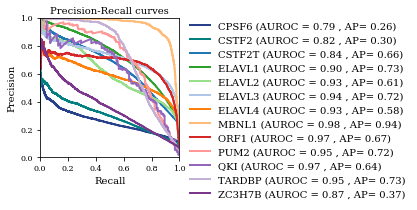

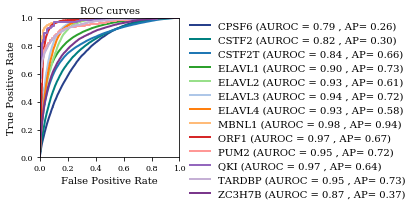

In [4]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import matplotlib

y_true_high=y_test_RBP_high
y_pred_high=pred_high

y_true_med=y_test_RBP_med
y_pred_med=pred_med

y_true_low=y_test_RBP_low
y_pred_low=pred_low


precision_high = [None] * len(RBPnames_high)
recall_high = [None] * len(RBPnames_high)
average_precision_high = [None] * len(RBPnames_high)
fpr_high = [None] * len(RBPnames_high)
tpr_high = [None] * len(RBPnames_high)
roc_auc_high = [None] * len(RBPnames_high)
pr_auc_high = [None] * len(RBPnames_high)


for i in range(num_task_high):
    precision_high[i], recall_high[i], _ = precision_recall_curve(y_true_high[:, i],y_pred_high[:, i])
    average_precision_high[i] = average_precision_score(y_true_high[:, i], y_pred_high[:, i])
    pr_auc_high [i]= auc(recall_high[i],precision_high[i])
    fpr_high[i], tpr_high[i], _ = roc_curve(y_true_high[:, i], y_pred_high[:, i])
    roc_auc_high[i] = auc(fpr_high[i], tpr_high[i])

precision_med = [None] * len(RBPnames_med)
recall_med = [None] * len(RBPnames_med)
average_precision_med = [None] * len(RBPnames_med)

fpr_med = [None] * len(RBPnames_med)
tpr_med = [None] * len(RBPnames_med)
roc_auc_med = [None] * len(RBPnames_med)
pr_auc_med = [None] * len(RBPnames_med)

for i in range(num_task_med):
    precision_med[i], recall_med[i], _ = precision_recall_curve(y_true_med[:, i],y_pred_med[:, i])
    average_precision_med[i] = average_precision_score(y_true_med[:, i], y_pred_med[:, i])
    pr_auc_med[i]= auc(recall_med[i],precision_med[i])
    fpr_med[i], tpr_med[i], _ = roc_curve(y_true_med[:, i], y_pred_med[:, i])
    roc_auc_med[i] = auc(fpr_med[i], tpr_med[i])

    

precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true_low[:, i],y_pred_low[:, i])
    average_precision_low[i] = average_precision_score(y_true_low[:, i], y_pred_low[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true_low[:, i], y_pred_low[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
    

precision=precision_low + precision_med + precision_high
recall=recall_low + recall_med + recall_high
fpr= fpr_low + fpr_med + fpr_high
tpr= tpr_low + tpr_med + tpr_high
average_precision= average_precision_low + average_precision_med + average_precision_high 
roc_auc= roc_auc_low + roc_auc_med + roc_auc_high
RBPnames= np.concatenate((RBPnames_low , RBPnames_med , RBPnames_high), axis=0)

num_task = num_task_high + num_task_med + num_task_low


RBPnames= np.concatenate((RBPnames_low , RBPnames_med , RBPnames_high), axis=0)
RBPnames_selected=['MBNL1', 'PUM2', 'QKI','TARDBP', 'ELAVL2', 'ELAVL3', 'ELAVL4','ORF1','CPSF6','CSTF2', 'CSTF2T', 'ZC3H7B', 'ELAVL1']
RBPnames_selected.sort(key=str.lower)


#### define colors 
colors = [(39,64,139),(0,128,128),(31, 119, 180), (44, 160, 44), (152, 223, 138), (174, 199, 232),
          (255, 127, 14), (255, 187, 120),(214, 39, 40), (255, 152, 150), (148, 103, 189), (197, 176, 213),
          (122,55,139),(247, 182, 210),(140, 86, 75),(139,34,82)]

for i in range(len(colors)):  
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)


# modifying parameters for plot
from math import sqrt
golden_mean = (sqrt(5)-1.0)/2.0 #used for size=
fig_width = 4.5 # fig width in inches
fig_height = fig_width*golden_mean # fig height in inches
params = {'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10, 
              'font.size': 10, 
              'legend.fontsize': 10,
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': False,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }


#plot
matplotlib.rcParams.update(params)
plt.figure()
matplotlib.rcParams.update(params)

for i, color in zip(range(len(RBPnames_selected)), colors):
    rbp_ind=np.where(RBPnames==RBPnames_selected[i])[0][0]
    plt.plot(recall[rbp_ind], precision[rbp_ind], color=color, lw=2, 
             label='{0} (AUROC = {1:0.2f} , AP= {2:0.2f})' ''.format(RBPnames[rbp_ind], roc_auc[rbp_ind], 
                                                                     average_precision[rbp_ind]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.tick_params(axis='x',which='both',top='off')
plt.tick_params(axis='y',which='both',right='off')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc=2,ncol=1,bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()




plt.figure()
matplotlib.rcParams.update(params)

for i, color in zip(range(len(RBPnames_selected)), colors):
    rbp_ind=np.where(RBPnames==RBPnames_selected[i])[0][0]
    plt.plot(fpr[rbp_ind], tpr[rbp_ind], color=color, lw=2, 
             label='{0} (AUROC = {1:0.2f} , AP= {2:0.2f})' ''.format(RBPnames[rbp_ind], roc_auc[rbp_ind], 
                                                                     average_precision[rbp_ind]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.tick_params(axis='x',which='both',top='off')
plt.tick_params(axis='y',which='both',right='off')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc=2,ncol=1,bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout() 
plt.show()

### 6mers counting

In [5]:
# one example from the high models, you can change the RBPname to see the attribution map of other RBPs in high models
y=y_test_RBP_high
X=X_test_seq_high
pred=pred_high
RBPnames=RBPnames_high
RBPname= "CPSF6" 
RBP_index = np.where(RBPnames==RBPname)[0][0]

allpos=[sum(y[:,i]) for i in range(len(RBPnames))]
k=int(allpos[RBP_index]*0.1)
kmer_freqs_low, kmer_freqs_high = getkmer(X,y,pred,RBP_index,k)

/home/mghanba/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Need help getting started? Try the cookbook for R:
http://www.cookbook-r.com/Graphs/

  warnings.warn(x, RRuntimeWarning)
/home/mghanba/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

  warnings.warn(x, RRuntimeWarning)


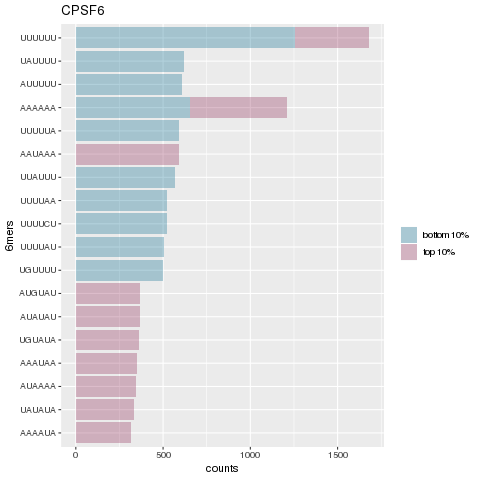

In [6]:
%%R -i kmer_freqs_low -i kmer_freqs_high -i RBPname
library(ggplot2)
toplow.kmers <- kmer_freqs_low[order(kmer_freqs_low, decreasing=TRUE)[1:10]]
tophigh.kmers <- kmer_freqs_high[order(kmer_freqs_high, decreasing=TRUE)[1:10]]
dflow <- data.frame(counts=toplow.kmers,kmer=names(toplow.kmers),label=rep("bottom 10%",length(toplow.kmers)))
dfhigh <- data.frame(counts=tophigh.kmers,kmer=names(tophigh.kmers),label=rep("top 10%",length(tophigh.kmers)))

dfall=rbind(dflow,dfhigh)
dfall$kmer=gsub("T", "U", dfall$kmer)

p1=  ggplot(dfall, aes(x=reorder(kmer, counts),y=counts,fill = label)) + 
geom_bar( stat="identity", position = position_stack(reverse = TRUE)) + 
coord_flip() + scale_fill_manual(name="",values = alpha(c("deepskyblue4", "violetred4"), .3))+ 
labs(title=RBPname)+labs(x = "6mers")#+ theme(legend.position = "top")+theme_bw() #+ scale_fill_manual(values = alpha(c("deepskyblue4", "violetred4"), .3))
p2= p1 + scale_fill_manual(name="",values = alpha(c("deepskyblue4", "violetred4"), .3))
print(p2)

### Score distribution

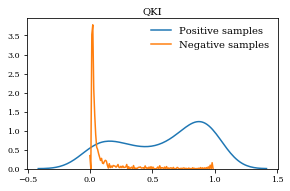

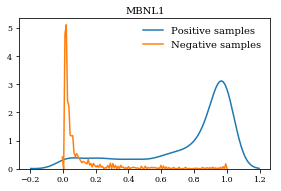

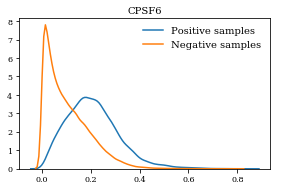

In [7]:
import seaborn as sns

y_test_RBP=y_test_RBP_low
pred=pred_low

RBPname="QKI" 
RBPnames=RBPnames_low
RBP_index = np.where(RBPnames==RBPname)[0][0]

posind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==1 ]
negind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==0 ]

sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False)
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False)
plt.legend()
plt.title(RBPname)
plt.show()
###
y_test_RBP=y_test_RBP_low
pred=pred_low

RBPname="MBNL1" 
RBPnames=RBPnames_low
RBP_index = np.where(RBPnames==RBPname)[0][0]

posind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==1 ]
negind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==0 ]

sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False)
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False)
plt.legend()
plt.title(RBPname)
plt.show()
###
y_test_RBP=y_test_RBP_high
pred=pred_high

RBPname="CPSF6"
RBPnames=RBPnames_high
RBP_index = np.where(RBPnames==RBPname)[0][0]

posind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==1 ]
negind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==0 ]

sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False)
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False)
plt.legend()
plt.title(RBPname)
plt.show()
